# IAT 461 Final Project - Initial EDA
Olivia Steed 301421820
Robin de Zwart 301336060

For our project we are using this Olympic history dataset found on Kaggle: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results?resource=download. It includes data from Athens 1896 to Rio 2016, and 
has 271116 rows, one corresponding to each athlete, and 15 columns including the olympics and result data related to them.

Columns:
- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

Questions 

Focus 1: What is the strongest predictor of qualifying for a medal?
- What factors contribute most strongly to winning?
- Are there common qualities gold medalists have?
- Do these qualities change based on the sport? Are some sports easier to predict than others?

Focus 2: How have the Olympics evolved over time?
- Have medalist attributes changed over time?
- How have the participating countries and participants per country evolved?
- How has the balance of female and male athletes changed over time?
- How has the amount of sports and medals changed over time?


Methods
- Overall athlete success indicators - using clustering to create athlete performance clusters
- Athlete success indicators by sport - using linear regression to predict which traits most strongly predict winning a medal

## 1. Initial EDA

In [7]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("athlete_events.csv")

In [9]:
# preview the dataframe
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [11]:
# check how many null values there are in each column
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Out of 271,115 rows of athletes, we are missing the age from 9474, the height from 60,171, and the weight from 62,875 records. These are large numbers, so we will try removing them, using mean, and using linear regression imputation to fill them and compare the results to decide which method to proceed with.

The medal column uses a null value to indicate not winning a medal, but this is confusing so we will replace the missing value with 'None' to show that the athlete just didn't win a medal but the data is not missing.

In [12]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


These summary statistics can start to show us an idea of the most common age, height, and weight of athletes who qualify to the Olympics.

- We can see that the mean age is 25.5 years with a low variance, since the standard deviation is only 6 years. The minimim age is 10 years (what?!), and the maximum is 97 (what?!!), which both seem like outliers. The mean is a bit larger than the median, indicating a very slightly right skewed distribution that is pretty close to normal.

- The mean height is 175cm, with a slightly wider variation, as the standard deviation is 10.5cm. The minimum is 127cm and the maximum is 226cm. because the mean and the median are the same, the distribution appears close to normal.

- The mean weight is 70kg, with the largest standard deviation of 14kg, with the minimum at 25kg and the maximum at 214kg. These both seem like extreme outliers, so we will consult a boxplot. The mean and the median are almost the same, indicating a near normal distribution.



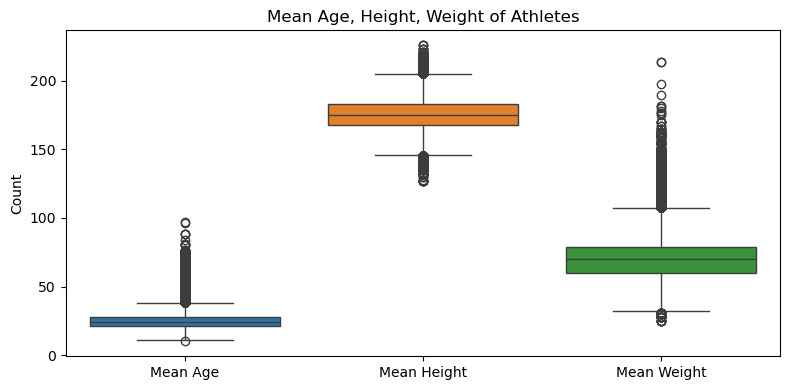

In [13]:
# looking at age data box plot

plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['Age', 'Height', 'Weight']])
plt.title('Mean Age, Height, Weight of Athletes')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Mean Age', 'Mean Height', 'Mean Weight'])
plt.tight_layout()
plt.show()

This boxplot confirms that the basic attributes of age, height, and weight have some clear low, and especially high, outliers. Interestingly, the middle quartiles and median all look even, indicating close to normal distributions with outliers on each side. We will test removing these later on to check how they change resulting models.

Weight has the most outliers, followed by age, and at least some of these should be removed to avoid skewing the data high. Height has evenly balanced high and low outliers which may cancel each other out. Age also has significant high outliers which could be removed to create a cleaner model.

This extreme variation could also be a function of the wide variety of sports, all requiring different body types for success. It may be a better approach to analyze the age, height, and weight by sport, and then remove outliers from indvidual sports to avoid removing all the light or heavy athletes and accidentally removing whole sports from the dataset.

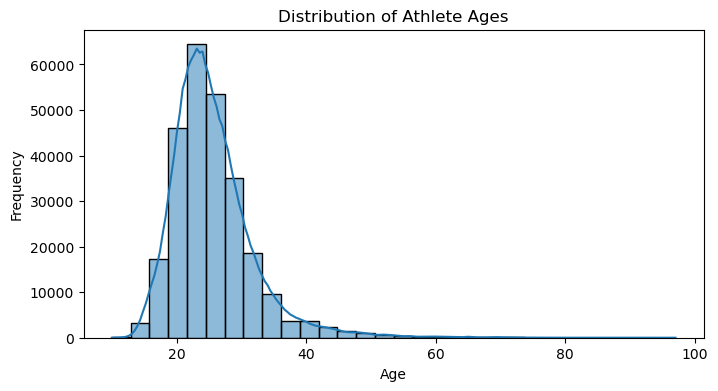

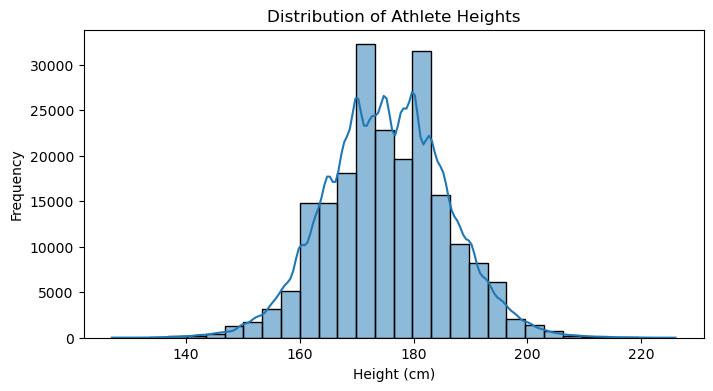

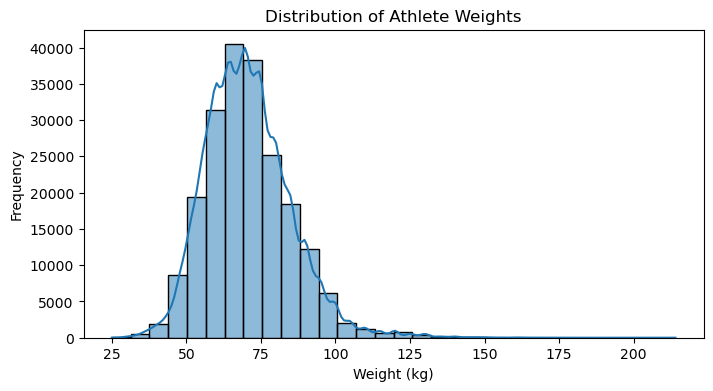

In [14]:
# looking at age, height, weight data histogram

plt.figure(figsize=(8, 4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Athlete Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['Height'].dropna(), bins=30, kde=True)
plt.title('Distribution of Athlete Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['Weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Athlete Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

The histograms give us an idea of the shape of the distribution. Overall, all of them are pretty close to normally distributed, but as seen above the age and weight values have some outliers that right skew the data, especially the age data. We will look at the ages by sport later to see if eliminating outliers improves results.

Here I'll do an initial check of the summary statistics from a couple of select sports to compare the distributions and outliers to see if this is common to all sports, or just the result of mixing so many extreme body types together into one analysis.

In [15]:
# get dataframe of athletes for each sport

# START [ChatGPT 4.o)]"i have a dataframe with olympics data with a row per athlete and then columns for things like age, height, weight, season, year, sport etc. i want to separate this into a dataframe for each sport (like one with all the athletes for basketball, one with all judo etc...) so i can calculate summary statistics for each. how would i do this?"

sport_dfs = {sport: sport_df for sport, sport_df in df.groupby('Sport')}

for sport, sport_df in sport_dfs.items():
    print(f"Summary statistics for {sport}:")
    print(sport_df[['Age', 'Height', 'Weight']].describe())
    print("\n")

# END [ChatGPT 4.o)]

Summary statistics for Aeronautics:
        Age  Height  Weight
count   1.0     0.0     0.0
mean   26.0     NaN     NaN
std     NaN     NaN     NaN
min    26.0     NaN     NaN
25%    26.0     NaN     NaN
50%    26.0     NaN     NaN
75%    26.0     NaN     NaN
max    26.0     NaN     NaN


Summary statistics for Alpine Skiing:
               Age       Height       Weight
count  8751.000000  6394.000000  6350.000000
mean     23.205462   173.489052    72.068110
std       3.987876     7.848716    11.283889
min      14.000000   142.000000    45.000000
25%      20.000000   168.000000    63.000000
50%      23.000000   173.000000    71.000000
75%      25.000000   180.000000    81.000000
max      55.000000   200.000000   107.000000


Summary statistics for Alpinism:
             Age  Height  Weight
count  16.000000     0.0     0.0
mean   38.812500     NaN     NaN
std     9.703736     NaN     NaN
min    22.000000     NaN     NaN
25%    33.000000     NaN     NaN
50%    38.000000     NaN     NaN
7

In [16]:
# show list of sports
sport_dfs.keys()

dict_keys(['Aeronautics', 'Alpine Skiing', 'Alpinism', 'Archery', 'Art Competitions', 'Athletics', 'Badminton', 'Baseball', 'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Biathlon', 'Bobsleigh', 'Boxing', 'Canoeing', 'Cricket', 'Croquet', 'Cross Country Skiing', 'Curling', 'Cycling', 'Diving', 'Equestrianism', 'Fencing', 'Figure Skating', 'Football', 'Freestyle Skiing', 'Golf', 'Gymnastics', 'Handball', 'Hockey', 'Ice Hockey', 'Jeu De Paume', 'Judo', 'Lacrosse', 'Luge', 'Military Ski Patrol', 'Modern Pentathlon', 'Motorboating', 'Nordic Combined', 'Polo', 'Racquets', 'Rhythmic Gymnastics', 'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting', 'Short Track Speed Skating', 'Skeleton', 'Ski Jumping', 'Snowboarding', 'Softball', 'Speed Skating', 'Swimming', 'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling'])

I'm going to pick Weightlifting and Rhythmic Gymnastics to look at individually, since I am assuming each of these has a different ideal physique and age range, so will give more insight into outliers than analyzing all sports. 

Making this list of sports shows one called 'Athletics' and one called 'Art Competitions' which seem unrelated to Olympics, so will have to be checked later.

In [17]:
# extracting individual datarframes for specific sports

weightlifting_df = sport_dfs['Weightlifting']
rhythmic_gymnastics_df = sport_dfs['Rhythmic Gymnastics']

In [18]:
# looking into weightlifting

weightlifting_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3937 entries, 80 to 271010
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3937 non-null   int64  
 1   Name    3937 non-null   object 
 2   Sex     3937 non-null   object 
 3   Age     3731 non-null   float64
 4   Height  3008 non-null   float64
 5   Weight  3803 non-null   float64
 6   Team    3937 non-null   object 
 7   NOC     3937 non-null   object 
 8   Games   3937 non-null   object 
 9   Year    3937 non-null   int64  
 10  Season  3937 non-null   object 
 11  City    3937 non-null   object 
 12  Sport   3937 non-null   object 
 13  Event   3937 non-null   object 
 14  Medal   646 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 492.1+ KB


In [19]:
weightlifting_df.describe()

,ID,Age,Height,Weight,Year
count,3937.000000,3731.000000,3008.000000,3803.000000,3937.000000
mean,69105.432563,25.502010,167.824801,78.726663,1980.595377
std,39175.024686,4.353875,9.949635,22.602393,26.744293
min,22.000000,15.000000,140.000000,47.000000,1896.000000
25%,34472.000000,22.000000,160.000000,60.000000,1964.000000
50%,70509.000000,25.000000,168.000000,75.000000,1984.000000
75%,103267.000000,28.000000,175.000000,90.000000,2004.000000
max,135521.000000,45.000000,205.000000,176.500000,2016.000000


Looking at the first individual sport, weightlifting, we can see that analyzing sports individually might be an issue due to limited number of athletes in each sport, as this one only has 3937, which is not as much to build a model off of as the over 200,000 total records. It may be a good idea to cluster the sports by athlete similarity first, and then analyze the summary statistics and predict outcomes for these smaller aggregate groups.

Upon analysis we can see that:
- Mean age is 25.5 with small standard deviation of 4. Min is 15 years and max is 45 years with median at 25 indicating normal distribution.

- Mean height is 167.8cm with small standard deviation of 9.9cm, min of 140cm and max of 205cm. Median is almost the same as mean at 168 indicating close to normal distribution.

- Mean weight is 78.7kg with larger standard deviation of 22kg. Min is 47kg and max is 176kg, with median a bit smaller than mean at 75kg. This indicates a right skewed distribution with high outliers.

Compared to the full dataset
- Age - mean:25.5, std:6, min:10, max:97

- Height - mean:175cm, std:10.5cm, min:127cm, max:226cm

- Weight - mean:70kg, std:14kg, min:25kg, max:214kg

Overall weightlifting is similar to the full dataset summary statistics, but as it is a subset, has a smaller age and height range that is normally distributed, and a high leaning weight range.

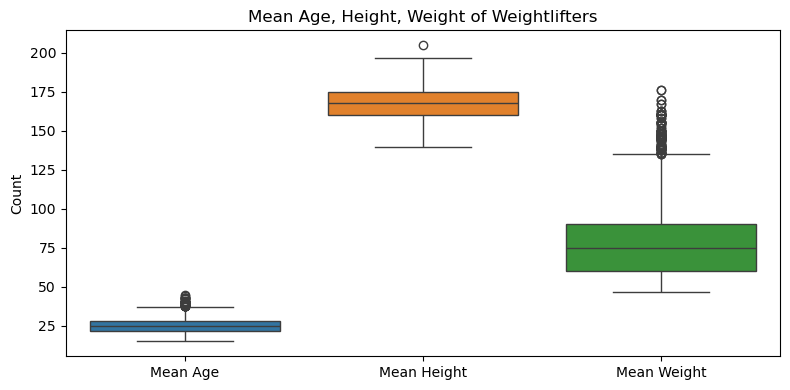

In [20]:
# weightlifting box plot

plt.figure(figsize=(8, 4))
sns.boxplot(data=weightlifting_df[['Age', 'Height', 'Weight']])
plt.title('Mean Age, Height, Weight of Weightlifters')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Mean Age', 'Mean Height', 'Mean Weight'])
plt.tight_layout()
plt.show()

These box plots show that the age, height, and weight of weightlifters are pretty normally distributed because the middle quartiles and medians are relatively centered. However, the weight is skewed by some high outliers that we will explore further with histograms.

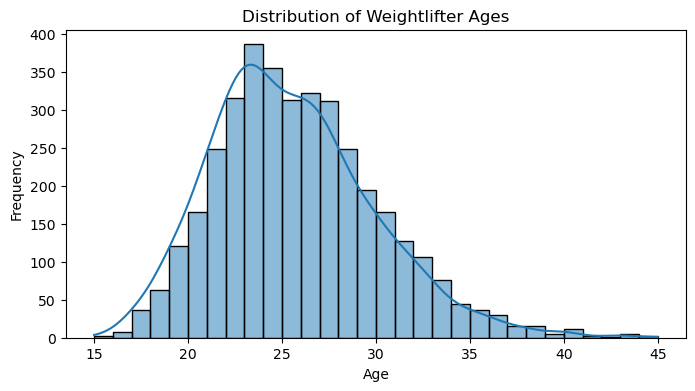

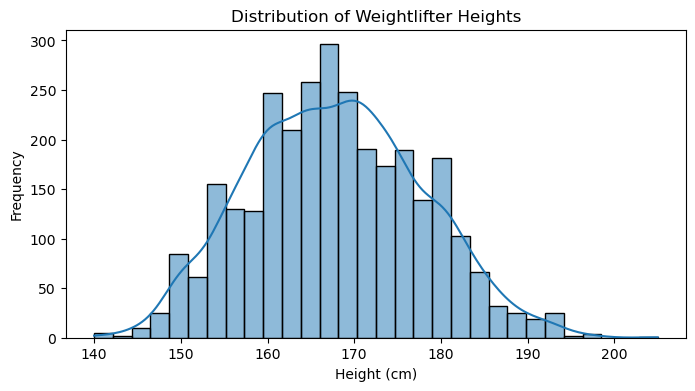

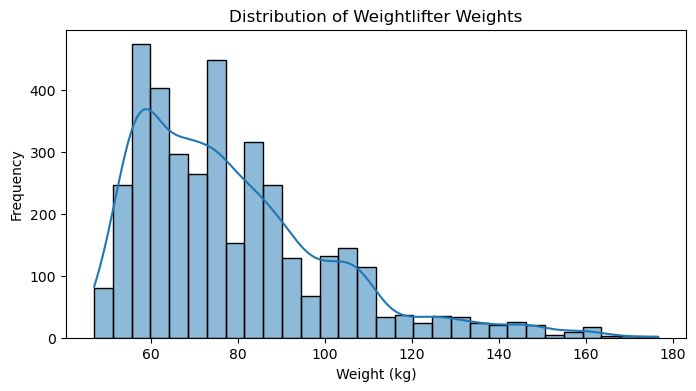

In [21]:
# histograms of weightlifter data

plt.figure(figsize=(8, 4))
sns.histplot(weightlifting_df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Weightlifter Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(weightlifting_df['Height'].dropna(), bins=30, kde=True)
plt.title('Distribution of Weightlifter Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(weightlifting_df['Weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Weightlifter Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

Because the data subset is a lot smaller than the full dataset, the histograms are less smooth, but the trends they depict are generally common to the full data with a pretty close to normally distributed age and height but of course with smaller ranges than the full data. Interestingly the weight it pretty clearly right skewed, indicating some high outliers.

For the second sport, I'll look at rhythmic gymnastics to compare summary statistics with the full dataset and weightlifter subsets.

In [22]:
rhythmic_gymnastics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658 entries, 667 to 270934
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      658 non-null    int64  
 1   Name    658 non-null    object 
 2   Sex     658 non-null    object 
 3   Age     658 non-null    float64
 4   Height  632 non-null    float64
 5   Weight  615 non-null    float64
 6   Team    658 non-null    object 
 7   NOC     658 non-null    object 
 8   Games   658 non-null    object 
 9   Year    658 non-null    int64  
 10  Season  658 non-null    object 
 11  City    658 non-null    object 
 12  Sport   658 non-null    object 
 13  Event   658 non-null    object 
 14  Medal   132 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 82.2+ KB


In [23]:
rhythmic_gymnastics_df.describe()

,ID,Age,Height,Weight,Year
count,658.00000,658.000000,632.000000,615.000000,658.000000
mean,71801.25228,18.737082,167.870253,48.760976,2003.161094
std,38943.85971,2.505250,5.381980,5.177291,9.338626
min,387.00000,13.000000,142.000000,30.000000,1984.000000
25%,37826.00000,17.000000,164.000000,45.000000,1996.000000
50%,74287.50000,18.000000,168.000000,49.000000,2004.000000
75%,104941.75000,20.000000,172.000000,52.000000,2012.000000
max,135488.00000,30.000000,181.000000,64.000000,2016.000000


Analyzing the gymnasts summary statistics:
- Age - mean 18.7 with very small standard deviation of 2.5 indicates tightly clustered data with a small variance. The minimum age is 13 and max is 30, with the median at 18, indicating a close to normal distribution.

- Height - mean height is 167cm with slightly larger standard deviation of 5.3cm, indicating another relatively tight data spread with small variance. The minimum is 142cm and the maximum is 181cm, with the median at 168cm, indicating a close to normal distribution since it is almost the same as the mean.

- Weight - the mean weight is 48kg, with a small standard deviation of 5kg. The min is 30kg and the max is 64kg, with the median at 49kg, indicating a close to normally distributed data range.

Compared to weightlifter subset:
- Age - mean:25.5, std: 4, min:5, max:45, median:25 

- Height - mean:167.8cm, std:9.9cm, min:140cm, max:205cm, median:168cm

- Weight - mean:78.7kg, std:22kg, min:47kg, max:176kg, median:75kg

Compared to the full dataset
- Age - mean:25.5, std:6, min:10, max:97

- Height - mean:175cm, std:10.5cm, min:127cm, max:226cm

- Weight - mean:70kg, std:14kg, min:25kg, max:214kg

Compared the the full and weightlifter dataset, the gymnasts are generally younger and shorter, and significantly lighter.

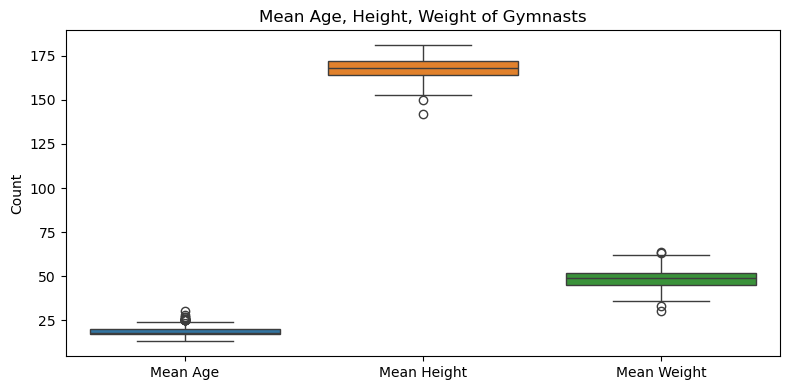

In [24]:
# rhythmic gymnastics box plot

plt.figure(figsize=(8, 4))
sns.boxplot(data=rhythmic_gymnastics_df[['Age', 'Height', 'Weight']])
plt.title('Mean Age, Height, Weight of Gymnasts')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Mean Age', 'Mean Height', 'Mean Weight'])
plt.tight_layout()
plt.show()

These boxplots show the very narrow range of age, height, and weight that gymnasts exhibit, likely because there is a clear ideal body type for gymnasts, but also because all of the rhythmic gymnasts are female, so there is a smaller range of body variation. There are some slight outliers for higher ages, lower heights, and higher and lower weights, but they are so close to the last quartile that they do not seem worth removing.

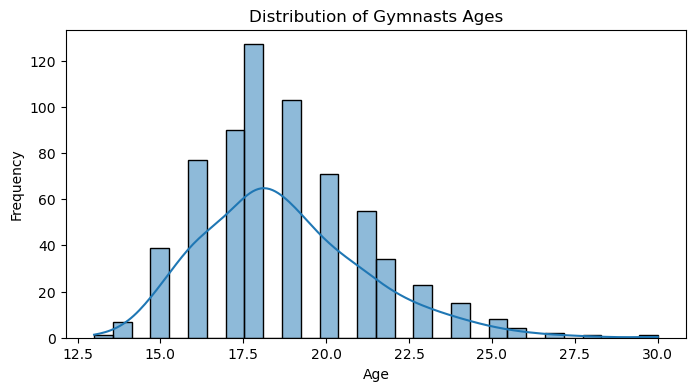

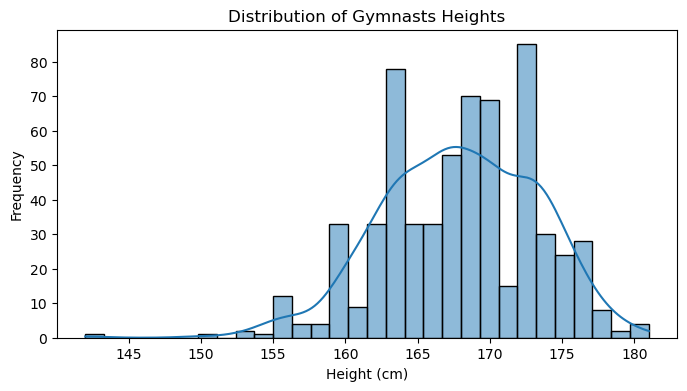

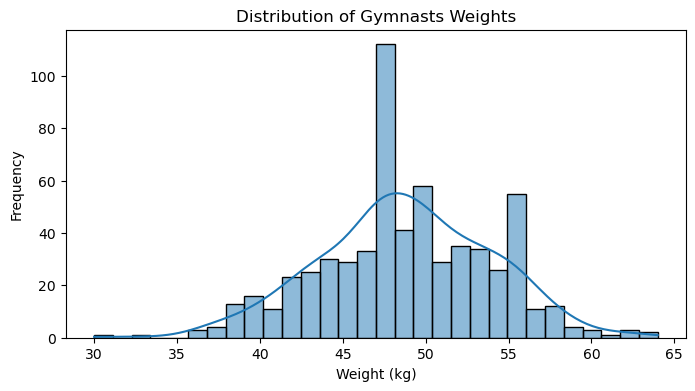

In [25]:
# histograms of gymnasts data

plt.figure(figsize=(8, 4))
sns.histplot(rhythmic_gymnastics_df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Gymnasts Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(rhythmic_gymnastics_df['Height'].dropna(), bins=30, kde=True)
plt.title('Distribution of Gymnasts Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(rhythmic_gymnastics_df['Weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Gymnasts Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

These histograms show a right skewed age range, indicating that higher ages are outliers, a left skewed height range, indicating that there are some significantly lower heights bringing down the mean, and a relatively normally distributed weight indicating that there is an ideal body composition for the sport. Interestingly, there is a very clear mode at about 47kg that the majority of atheletes fall into.

Analyzing weightlifting and gymnastics separately showed that there are clear and large differences between athletes in each sport, as the gender balance, ideal body composition, and ages differ drastically by sport. Based on this, removing outliers wholesale from the full dataset seems like a good way to remove entire sports from the dataset. 

We are aiming to predict the best predictor of qualifying for a medal, but that will be different for each sport. In light of this, it makes sense to cluster the sports into athlete similarity clusters using bottom-up agglomerative clustering (since we don't know how many athlete similarity groups there are), and then use linear regression to model the medal winning predictors to see what qualities are the most important in each group.

---
# TODO - post-proposal stuff we gotta do

TODO
- what to do about repeated athletes (there is a row for each event - meaning people who compete in multiple events have multiple rows)
- dealing with missing values with removal, imputation by mean, linear regression and compare best option

steps

- clustering all the data
- feature engineering for potential factors contributing to medal winning (3-4 of them)
- linear regression models on each cluster to predict strongest medal indicators
- experimenting with removing outliers - effect on regression results

plus

- also analysis of gender, participants, cities, medals, sports over time to show changes 
- may also want to do prediction models for success at different times to see if success indicators have changed

---

## 2. Dealing with Redundant and Missing Values

As discovered above, there are missing values in the age, height, and weight columns which need to be addressed, since age is missing from 9474 records, height is missing from 60,171, and weight is missing from 62,875 records. Since there are so many missing values, we will experiment with removal, and mean and linear regression imputation to see what leads to the best results.

First, however I will address that not winning a medal is shown as a value. I'll replace the NaN with 'None' so the dataset can be analyzed properly.

In [36]:
# replacing NaN for no medal with 'none' value

df['Medal'] = df['Medal'].fillna('None')

Now I'll work on addressing the age, height, and weight missing values.

In [28]:
# linear regression function from lab code

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# X: a DataFrame or array of features (independent variables), such as height, weight, or steps.
# y: a Series or array of the target variable (dependent variable), such as sleep hours.

def run_LR(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    intercept = model.intercept_
    coefficients = model.coef_

    print("\nLinear Regression Formula:")
    formula = f"y = {intercept:.4f}"
    for i, coef in enumerate(coefficients):
        formula += f" + ({coef:.4f} * x{i+1})"
    print(formula)

    rmse = np.sqrt(np.mean((y - y_pred) ** 2))
    print(f"RMSE: {rmse:.4f}")

    r2 = model.score(X, y)
    print(f"R² Score: {r2:.4f}")

    return model, y_pred

### Removing redundant values and columns

For the missing age, height, and weight values, we will first try to drop all the null records and run a linear regression to get a baseline value. To run regression everything has to be in a numerical format, so we need reshape the dataframe to have non numeric values one-hot encoded. 

This also gives an opportunity to make sure no data is redundant and all columns are readible.

In [37]:
# dropping Games column since it has data already included in the Year and Season columns (ie. Summer 2022 is already covered by Year=2022 and Season=Summer)
df = df.drop(columns=['Games'])

In [ ]:
# replace NOC with country names from noc_regions.csv - this makes it more readable and useful for analysis

# START [ChatGPT 4.o)]"i have a dataframe now that has a column called NOC with country codes (ie. EGY, TAN, USA) and i want the country names. I have another csv of country codes and corresponding country names. how would i replace the codes with the country values in the original dataframe?"

# Load the mapping CSV
noc_map = pd.read_csv('noc_regions.csv')  # this contains 'NOC' and 'Country' columns

# Create a dictionary from the mapping
noc_dict = dict(zip(noc_map['NOC'], noc_map['region']))

# Replace NOC codes with country names
df['NOC'] = df['NOC'].map(noc_dict)

# END [ChatGPT 4.o)]

# rename from NOC to Region
df = df.rename(columns={'NOC': 'Region'})
df.head(10)



,ID,Name,Sex,Age,Height,Weight,Team,Region,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,Netherlands,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,Netherlands,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,Netherlands,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,None
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,Netherlands,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",None


In [41]:
# one hot encoding non numeric columns

df_encoded = pd.get_dummies(df, columns=['Sex', 'Team', 'Region', 'Season', 'City', 'Sport', 'Event', 'Medal'], dtype=int)

df_encoded.head(10)

,ID,Name,Age,Height,Weight,Year,Sex_F,Sex_M,Team_30. Februar,Team_A North American Team,...,"Event_Wrestling Women's Featherweight, Freestyle","Event_Wrestling Women's Flyweight, Freestyle","Event_Wrestling Women's Heavyweight, Freestyle","Event_Wrestling Women's Light-Heavyweight, Freestyle","Event_Wrestling Women's Lightweight, Freestyle","Event_Wrestling Women's Middleweight, Freestyle",Medal_Bronze,Medal_Gold,Medal_None,Medal_Silver
0,1,A Dijiang,24.0,180.0,80.0,1992,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,A Lamusi,23.0,170.0,60.0,2012,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,Gunnar Nielsen Aaby,24.0,NaN,NaN,1920,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,Edgar Lindenau Aabye,34.0,NaN,NaN,1900,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,Christine Jacoba Aaftink,21.0,185.0,82.0,1988,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,5,Christine Jacoba Aaftink,21.0,185.0,82.0,1988,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,5,Christine Jacoba Aaftink,25.0,185.0,82.0,1992,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,5,Christine Jacoba Aaftink,25.0,185.0,82.0,1992,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,5,Christine Jacoba Aaftink,27.0,185.0,82.0,1994,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,5,Christine Jacoba Aaftink,27.0,185.0,82.0,1994,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Hmm, this results in 2,276 columns which is way too many. Perhaps we should condense all the Sports together instead of having each event within each sport to reduce the number of columns to a bit over 60. This would mean we can drop the event column and just rely on the sport. As a result, we will have a row for each games an athlete has participated in and the general sport category they competed in.

In [42]:
# dropping event column since we are just going to use sport column to reduce massive dataframe size
df = df.drop(columns=['Event'])

In [43]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Team', 'Region', 'Season', 'City', 'Sport', 'Medal'], dtype=int)

df_encoded.head(10)

,ID,Name,Age,Height,Weight,Year,Sex_F,Sex_M,Team_30. Februar,Team_A North American Team,...,Sport_Triathlon,Sport_Tug-Of-War,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling,Medal_Bronze,Medal_Gold,Medal_None,Medal_Silver
0,1,A Dijiang,24.0,180.0,80.0,1992,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,A Lamusi,23.0,170.0,60.0,2012,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,Gunnar Nielsen Aaby,24.0,NaN,NaN,1920,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,Edgar Lindenau Aabye,34.0,NaN,NaN,1900,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,Christine Jacoba Aaftink,21.0,185.0,82.0,1988,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,5,Christine Jacoba Aaftink,21.0,185.0,82.0,1988,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,5,Christine Jacoba Aaftink,25.0,185.0,82.0,1992,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,5,Christine Jacoba Aaftink,25.0,185.0,82.0,1992,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,5,Christine Jacoba Aaftink,27.0,185.0,82.0,1994,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,5,Christine Jacoba Aaftink,27.0,185.0,82.0,1994,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


The team is also an issue since there are still over 1000 columns which is crazy. To reduce this, we can just drop the team column and rely on the region value instead, since the teams indicate different groups from the same country, but don't mean much when there are so many of them.

In [44]:
# dropping team column since we are just going to use region column to reduce massive dataframe size
df = df.drop(columns=['Team'])

### One-hot encoding

In [45]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Region', 'Season', 'City', 'Sport', 'Medal'], dtype=int)

df_encoded.head(10)

,ID,Name,Age,Height,Weight,Year,Sex_F,Sex_M,Region_Afghanistan,Region_Albania,...,Sport_Triathlon,Sport_Tug-Of-War,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling,Medal_Bronze,Medal_Gold,Medal_None,Medal_Silver
0,1,A Dijiang,24.0,180.0,80.0,1992,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,A Lamusi,23.0,170.0,60.0,2012,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,Gunnar Nielsen Aaby,24.0,NaN,NaN,1920,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,Edgar Lindenau Aabye,34.0,NaN,NaN,1900,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,Christine Jacoba Aaftink,21.0,185.0,82.0,1988,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,5,Christine Jacoba Aaftink,21.0,185.0,82.0,1988,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,5,Christine Jacoba Aaftink,25.0,185.0,82.0,1992,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,5,Christine Jacoba Aaftink,25.0,185.0,82.0,1992,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,5,Christine Jacoba Aaftink,27.0,185.0,82.0,1994,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,5,Christine Jacoba Aaftink,27.0,185.0,82.0,1994,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


327 columns is still a lot, but we'll try it for now. If it proves to be too much, we can try to group the regions, but this would lose us some specificity. 

Finally, now that the redundant and excessive data has been removed and the values are all one hot encoded, we can perform the baseline linear regression with removed missing values.

### Comparing imputation methods

In [ ]:
# making copy and removing rows with missing values

df_nulls_removed = df_encoded.copy()

df_nulls_removed = df_nulls_removed.dropna(subset=['Age', 'Height', 'Weight'])

# define X (features) and y (target) - note that I am only including numeric features for now since those are the ones with missing values that I am testing to fill with imputation
X = df_nulls_removed[['Height', 'Weight', 'Age']]
y = df_nulls_removed['Medal_Gold']  # only predicting likelihood of winning a gold medal for now

model, y_pred = run_LR(X, y)



Linear Regression Formula:
y = -0.1085 + (0.0007 * x1) + (0.0004 * x2) + (0.0000 * x3)
RMSE: 0.2161
R² Score: 0.0035


Interestingly, these results indicate that height, weight, and age are not strongly correlated to gold medal winning. 

- None of the coefficients (age, height, weight) have a significant effect on the target variable (gold medal winning).
- The RMSE indicates that the model has about 21% error, which is not great.
- The R² indicates that the model only explains 0.35% of the target variable variance which is next to nothing.


The poor results may be because of the removed rows that contained the missing values, so we can compare this to mean missing value imputation. We are using mean imputation as opposed to median, because the age, weight, and height distributions are relatively normally distributed, so mean is appropriate.

In [ ]:
# making copy and performing mean imputation on missing values (based on lab code)

df_mean_imputed = df_encoded.copy()

# calculate the mean height from available values
mean_height = df_mean_imputed['Height'].mean()

# calculate the mean age from available values
mean_age = df_mean_imputed['Age'].mean()

# calculate the mean weight from available values
mean_weight = df_mean_imputed['Weight'].mean()

# fill the remaining missing height values with the mean
df_mean_imputed['Height'] = df_mean_imputed['Height'].fillna(mean_height)
df_mean_imputed['Age'] = df_mean_imputed['Age'].fillna(mean_age)
df_mean_imputed['Weight'] = df_mean_imputed['Weight'].fillna(mean_weight)

# dropping any remaining rows with missing required values (just to make sure everything is okay!)
df_mean_clean = df_mean_imputed.dropna(subset=['Height', 'Weight', 'Age'])

X = df_mean_clean[['Height', 'Weight', 'Age']]
y = df_mean_clean['Medal_Gold']

# running the regression
model, y_pred = run_LR(X, y)


Linear Regression Formula:
y = -0.1085 + (0.0007 * x1) + (0.0004 * x2) + (0.0002 * x3)
RMSE: 0.2162
R² Score: 0.0027


The results from mean imputation are very similar, but slightly worse.
- The coefficients of age, weight, and height have the same very low impact on the target variable.
- The RMSE is the same, indicating an approximate 21% error rate.
- The R² is worse than simply removing the missing values, indicating that this model only accounts for 0.27% of the target variable variance.


This may be because this is considering all the sports together, and the values are so different that the mean isn't actually that indicative. We will try one more test with linear regression imputation to add more nuance to the process.

In [ ]:
# making copy and performing linear regression imputation on missing values (based on lab code)

df_predicted_imputed = df_encoded.copy()

# impute missing HEIGHT from Weight and Age 
height_train = df_predicted_imputed.dropna(subset=['Height', 'Weight', 'Age'])
X_height = height_train[['Weight', 'Age']]
y_height = height_train['Height']

height_model = LinearRegression()
height_model.fit(X_height, y_height)

missing_height_mask = df_predicted_imputed['Height'].isna() & df_predicted_imputed['Weight'].notna() & df_predicted_imputed['Age'].notna()
X_missing_height = df_predicted_imputed.loc[missing_height_mask, ['Weight', 'Age']]
predicted_heights = height_model.predict(X_missing_height)
df_predicted_imputed.loc[missing_height_mask, 'Height'] = np.round(predicted_heights, 1)

# impute missing WEIGHT from Height and Age
weight_train = df_predicted_imputed.dropna(subset=['Weight', 'Height', 'Age'])
X_weight = weight_train[['Height', 'Age']]
y_weight = weight_train['Weight']

weight_model = LinearRegression()
weight_model.fit(X_weight, y_weight)

missing_weight_mask = df_predicted_imputed['Weight'].isna() & df_predicted_imputed['Height'].notna() & df_predicted_imputed['Age'].notna()
X_missing_weight = df_predicted_imputed.loc[missing_weight_mask, ['Height', 'Age']]
predicted_weights = weight_model.predict(X_missing_weight)
df_predicted_imputed.loc[missing_weight_mask, 'Weight'] = np.round(predicted_weights, 1)

# impute missing AGE from Height and Weight 
age_train = df_predicted_imputed.dropna(subset=['Age', 'Height', 'Weight'])
X_age = age_train[['Height', 'Weight']]
y_age = age_train['Age']

age_model = LinearRegression()
age_model.fit(X_age, y_age)

missing_age_mask = df_predicted_imputed['Age'].isna() & df_predicted_imputed['Height'].notna() & df_predicted_imputed['Weight'].notna()
X_missing_age = df_predicted_imputed.loc[missing_age_mask, ['Height', 'Weight']]
predicted_ages = age_model.predict(X_missing_age)
df_predicted_imputed.loc[missing_age_mask, 'Age'] = np.round(predicted_ages, 1)

# drop any rows with missing values still present 
df_predicted_clean = df_predicted_imputed.dropna(subset=['Height', 'Weight', 'Age', 'Medal_Gold'])

# use imputed data to predict GOLD medal 
X = df_predicted_clean[['Height', 'Weight', 'Age']]
y = df_predicted_clean['Medal_Gold']

model, y_pred = run_LR(X, y)



Linear Regression Formula:
y = -0.1080 + (0.0007 * x1) + (0.0004 * x2) + (0.0001 * x3)
RMSE: 0.2177
R² Score: 0.0034


These results are about the same as the other methods.
- The coefficients of age, weight, and height have the same very low impact on the target variable.
- The RMSE is the same, indicating an approximate 21% error rate.
- The R² is slightly better than mean imputation, but not as good as simply removing the values. 



Imputation Method Comparison (Linear Regression):

| Imputation Method  | x1 (height)    | x2 (weight) | x3 (age) | RMSE | R²   |
|----|------------|-----------|--------|----------|--------|
| Removal  | 0.0007  | 0.0004    | 0.0000 | 0.2161   | 0.0035 |
| Mean  | 0.0007  | 0.0004    | 0.0002 | 0.2162   | 0.0027 |
| Linear regression  | 0.0007  | 0.0004    | 0.0001 | 0.2177   | 0.0034 |

Here we can see that missing value removal was actually the best performing, as it has the lowest RMSE and highest R².

### Was linear regression the right call?

Although this linear regression is only intended to test and compare different imputation methods, the Medal_Gold column is binary, so logistic regression may be a better option for assessing methods. Here we will do logistic regression for each method and compare it to ensure we pick the right method to move forward with for clustering.

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [68]:
# method 1: removing rows with missing values for logistic regression

X = df_nulls_removed[['Age', 'Height', 'Weight']]
y = df_nulls_removed['Medal_Gold']  # Assuming 'Medal_Gold' is a binary column (0 or 1)

model = LogisticRegression()
model.fit(X, y)

y_pred_proba = model.predict_proba(X)[:, 1]  # probability of class 1 (Gold)
y_pred_class = model.predict(X)             # binary prediction (0 or 1)

print("Accuracy:", accuracy_score(y, y_pred_class))
print(classification_report(y, y_pred_class))

Accuracy: 0.9506851308418015
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    195998
           1       0.00      0.00      0.00     10167

    accuracy                           0.95    206165
   macro avg       0.48      0.50      0.49    206165
weighted avg       0.90      0.95      0.93    206165



/opt/anaconda3/envs/tutorials/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tutorials/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tutorials/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [69]:
# method 2: mean imputation for logistic regression

X = df_mean_clean[['Height', 'Weight', 'Age']]
y = df_mean_clean['Medal_Gold']

# Train logistic regression
mean_model = LogisticRegression()
mean_model.fit(X, y)

# Predict probabilities or class labels
y_pred_proba = mean_model.predict_proba(X)[:, 1]  # probability of class 1 (Gold)
y_pred_class = mean_model.predict(X)             # binary prediction (0 or 1)

# Evaluate
print("Accuracy:", accuracy_score(y, y_pred_class))
print(classification_report(y, y_pred_class))

Accuracy: 0.95067793859455
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    257744
           1       0.00      0.00      0.00     13372

    accuracy                           0.95    271116
   macro avg       0.48      0.50      0.49    271116
weighted avg       0.90      0.95      0.93    271116



/opt/anaconda3/envs/tutorials/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tutorials/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tutorials/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [70]:
# method 3: linear regression imputation for logistic regression

X = df_predicted_clean[['Height', 'Weight', 'Age']]
y = df_predicted_clean['Medal_Gold']

# Train logistic regression
mean_model = LogisticRegression()
mean_model.fit(X, y)

# Predict probabilities or class labels
y_pred_proba = mean_model.predict_proba(X)[:, 1]  # probability of class 1 (Gold)
y_pred_class = mean_model.predict(X)             # binary prediction (0 or 1)

# Evaluate
print("Accuracy:", accuracy_score(y, y_pred_class))
print(classification_report(y, y_pred_class))

Accuracy: 0.9499268764447799
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    201356
           1       0.00      0.00      0.00     10614

    accuracy                           0.95    211970
   macro avg       0.47      0.50      0.49    211970
weighted avg       0.90      0.95      0.93    211970



/opt/anaconda3/envs/tutorials/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tutorials/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tutorials/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

When assessing with logistic regression, the imputation methods do not have any difference, so linear regression actually was more helpful in this case to assess the methods.

Imputation Method Comparison (Logistic Regression - weighted average):

| Imputation Method  | precision    | recall | f-1 score | support | 
|----|------------|-----------|--------|----------|
| Removal  | 0.90  | 0.95    | 0.93 | 206165   | 
| Mean  | 0.90  | 0.95    | 0.93 | 271116   | 
| Linear regression  | 0.90   | 0.95     | 0.93  | 211970  |

Based on these results, we are going to go with the simplest method and just remove the missing values to create a dataframe for subsequent usage, since that model performs the best when tested with linear regression.

### Best performing dataframe

In [72]:
# this is the dataset to use for further analysis - it has redundant columns and missing values removed

df_nulls_removed.head(10)

,ID,Name,Age,Height,Weight,Year,Sex_F,Sex_M,Region_Afghanistan,Region_Albania,...,Sport_Triathlon,Sport_Tug-Of-War,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling,Medal_Bronze,Medal_Gold,Medal_None,Medal_Silver
0,1,A Dijiang,24.0,180.0,80.0,1992,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,A Lamusi,23.0,170.0,60.0,2012,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,Christine Jacoba Aaftink,21.0,185.0,82.0,1988,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,5,Christine Jacoba Aaftink,21.0,185.0,82.0,1988,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,5,Christine Jacoba Aaftink,25.0,185.0,82.0,1992,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,5,Christine Jacoba Aaftink,25.0,185.0,82.0,1992,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,5,Christine Jacoba Aaftink,27.0,185.0,82.0,1994,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,5,Christine Jacoba Aaftink,27.0,185.0,82.0,1994,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,6,Per Knut Aaland,31.0,188.0,75.0,1992,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
11,6,Per Knut Aaland,31.0,188.0,75.0,1992,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


This is still a lot of regions, so we might end up aggregating them, or removing region altogether, but we will try it for now.

## 3. Feature Engineering

Now that redundant and missing values are removed, let's make some features to further describe the athletes and data. 

Recalling our research questions will give guidance into what features to produce.

Focus 1: What is the strongest predictor of qualifying for a medal?
- What factors contribute most strongly to winning?
- Are there common qualities gold medalists have?
- Do these qualities change based on the sport? Are some sports easier to predict than others?

Focus 2: How have the Olympics evolved over time?
- Have medalist attributes changed over time?
- How have the participating countries and participants per country evolved?
- How has the balance of female and male athletes changed over time?
- How has the amount of sports and medals changed over time?

### Focus 1: Medal win predictors

Potentially useful features to engineer include:
- Number of medals won total (per athlete)
- Number of olympics competed in (per athlete)
- First Olympics (boolean)
- BMI per athlete
- Age range 
- Origin continent

Analyzing the dataframe for this part, it became clear that we still need to remove some redundant data. Previously we removed the event column since to properly process it with one-hot encoding meant to have thousands of columns in the dataframe. Removing this however has left multiple rows for each athlete with the same data, or data that's only difference is the medals won. It would make more sense to aggregate the data into one row per athlete and list the number of medals won, number of events participated in, and type of medals in columns.

I'm going to do this to the original df and then drop the dropped event and games columns, and reencode the one-hot encodings assuming it will perform the same as the tests above.

### Number of medals and Olympics per athlete

In [84]:
# aggregate data to get one row per athlete with total medals and events

# START [ChatGPT 4.o)]"how would i deal with athletes that compete over multiple years? i think having a new row for each olympics they compete in (different year) is a good idea. how would i do this?"

grouped = df.groupby(['Name', 'Age', 'Sex', 'Height', 'Weight', 'Sport', 'Season', 'Year', 'City', 'Region'])

# Step 3: Aggregate the required metrics
aggregated_df = grouped.agg(
    Num_Events=('Medal', 'count'),
    Num_Medals=('Medal', lambda x: x[x != 'None'].count()),
    Gold=('Medal', lambda x: (x == 'Gold').sum()),
    Silver=('Medal', lambda x: (x == 'Silver').sum()),
    Bronze=('Medal', lambda x: (x == 'Bronze').sum())
).reset_index()

# END [ChatGPT 4.o)]

# convert Age to int type since anything else doesn't make sense
aggregated_df['Age'] = aggregated_df['Age'].astype(int)
aggregated_df['Height'] = aggregated_df['Height'].astype(int)
aggregated_df['Weight'] = aggregated_df['Weight'].astype(int)

aggregated_df.head(10)

,Name,Age,Sex,Height,Weight,Sport,Season,Year,City,Region,Num_Events,Num_Medals,Gold,Silver,Bronze
0,Th Anh,20,0,165,58,Fencing,Summer,2016,Rio de Janeiro,Vietnam,1,0,0,0,0
1,Th Ngn Thng,19,0,147,47,Gymnastics,Summer,2008,Beijing,Vietnam,5,0,0,0,0
2,Th Ngn Thng,23,0,147,47,Gymnastics,Summer,2012,London,Vietnam,2,0,0,0,0
3,Tin Tun,21,1,173,63,Boxing,Summer,1988,Seoul,Vietnam,1,0,0,0,0
4,A Dijiang,24,1,180,80,Basketball,Summer,1992,Barcelona,China,1,0,0,0,0
5,A Lamusi,23,1,170,60,Judo,Summer,2012,London,China,1,0,0,0,0
6,"A. J. Tyronne Benildus ""Benny"" Fernando",27,1,179,70,Athletics,Summer,1996,Atlanta,Sri Lanka,1,0,0,0,0
7,"A. Joshua ""Josh"" West",27,1,207,105,Rowing,Summer,2004,Athina,UK,1,0,0,0,0
8,"A. Joshua ""Josh"" West",31,1,207,105,Rowing,Summer,2008,Beijing,UK,1,1,0,1,0
9,"A. W. Nancy ""Nan"" Rae",16,0,156,53,Swimming,Summer,1960,Roma,UK,1,0,0,0,0


This is a much more helpful format as it gives an idea of the medals and number of events without having to one hot encode them all, so we can use **aggregated_df** going forwards. Now we'll redo converting the categorical variables to numeric with mapping and one-hot encoding for region, city, and sport.

In [79]:
# mapping Sex to M = 1 and F = 0

aggregated_df['Sex'] = aggregated_df['Sex'].map({'M': 1, 'F': 0})

### First Olympics

Another potential feature is if it is the athlete's first Olympics or not, so we will add a boolean column for this.

In [ ]:
# adding first Olympics boolean column - 1 = true, 0 = false

# START [ChatGPT 4.o)]"how would i get a boolean column for if it is their first olympics or now (based on the data i already have of athletes and each olympics they've competed in)"

first_year = aggregated_df.groupby('Name')['Year'].transform('min')

aggregated_df['First_Olympics'] = (aggregated_df['Year'] == first_year).astype(int)

# END [ChatGPT 4.o)]

aggregated_df.head(10)

,Name,Age,Sex,Height,Weight,Sport,Season,Year,City,Region,Num_Events,Num_Medals,Gold,Silver,Bronze,First_Olympics
0,Th Anh,20,0,165,58,Fencing,Summer,2016,Rio de Janeiro,Vietnam,1,0,0,0,0,1
1,Th Ngn Thng,19,0,147,47,Gymnastics,Summer,2008,Beijing,Vietnam,5,0,0,0,0,1
2,Th Ngn Thng,23,0,147,47,Gymnastics,Summer,2012,London,Vietnam,2,0,0,0,0,0
3,Tin Tun,21,1,173,63,Boxing,Summer,1988,Seoul,Vietnam,1,0,0,0,0,1
4,A Dijiang,24,1,180,80,Basketball,Summer,1992,Barcelona,China,1,0,0,0,0,1
5,A Lamusi,23,1,170,60,Judo,Summer,2012,London,China,1,0,0,0,0,1
6,"A. J. Tyronne Benildus ""Benny"" Fernando",27,1,179,70,Athletics,Summer,1996,Atlanta,Sri Lanka,1,0,0,0,0,1
7,"A. Joshua ""Josh"" West",27,1,207,105,Rowing,Summer,2004,Athina,UK,1,0,0,0,0,1
8,"A. Joshua ""Josh"" West",31,1,207,105,Rowing,Summer,2008,Beijing,UK,1,1,0,1,0,0
9,"A. W. Nancy ""Nan"" Rae",16,0,156,53,Swimming,Summer,1960,Roma,UK,1,0,0,0,0,1


### BMI per athlete

Because height and weight changes so drastically, BMI may be a better generalizable metric to compare across athletes in differing sports.

In [87]:
# add column for BMI per athlete

aggregated_df['BMI'] = (aggregated_df['Weight'] / (aggregated_df['Height'] / 100) ** 2).round(1)

aggregated_df.head(10)

,Name,Age,Sex,Height,Weight,Sport,Season,Year,City,Region,Num_Events,Num_Medals,Gold,Silver,Bronze,First_Olympics,BMI
0,Th Anh,20,0,165,58,Fencing,Summer,2016,Rio de Janeiro,Vietnam,1,0,0,0,0,1,21.3
1,Th Ngn Thng,19,0,147,47,Gymnastics,Summer,2008,Beijing,Vietnam,5,0,0,0,0,1,21.8
2,Th Ngn Thng,23,0,147,47,Gymnastics,Summer,2012,London,Vietnam,2,0,0,0,0,0,21.8
3,Tin Tun,21,1,173,63,Boxing,Summer,1988,Seoul,Vietnam,1,0,0,0,0,1,21.0
4,A Dijiang,24,1,180,80,Basketball,Summer,1992,Barcelona,China,1,0,0,0,0,1,24.7
5,A Lamusi,23,1,170,60,Judo,Summer,2012,London,China,1,0,0,0,0,1,20.8
6,"A. J. Tyronne Benildus ""Benny"" Fernando",27,1,179,70,Athletics,Summer,1996,Atlanta,Sri Lanka,1,0,0,0,0,1,21.8
7,"A. Joshua ""Josh"" West",27,1,207,105,Rowing,Summer,2004,Athina,UK,1,0,0,0,0,1,24.5
8,"A. Joshua ""Josh"" West",31,1,207,105,Rowing,Summer,2008,Beijing,UK,1,1,0,1,0,0,24.5
9,"A. W. Nancy ""Nan"" Rae",16,0,156,53,Swimming,Summer,1960,Roma,UK,1,0,0,0,0,1,21.8


### Age ranges
To make ages more meaningful, we can bin them into categories based on age groups. This will give us less to analyze so we can compare differences more meaningfully.

In [88]:
# binning ages into decade groups for easier analysis

# START [ChatGPT 4.o)]"can you make some age ranges for a range between 9 and 72? How would I add these to my dataframe as a new column?"
bins = [9, 19, 29, 39, 49, 59, 69, 79]  # decade edges
labels = [
    '10s', '20s', '30s', '40s', '50s', '60s', '70s'
]
aggregated_df['Age_Group'] = pd.cut(aggregated_df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)
# END [ChatGPT 4.o)]

aggregated_df.head(10)

,Name,Age,Sex,Height,Weight,Sport,Season,Year,City,Region,Num_Events,Num_Medals,Gold,Silver,Bronze,First_Olympics,BMI,Age_Group
0,Th Anh,20,0,165,58,Fencing,Summer,2016,Rio de Janeiro,Vietnam,1,0,0,0,0,1,21.3,20s
1,Th Ngn Thng,19,0,147,47,Gymnastics,Summer,2008,Beijing,Vietnam,5,0,0,0,0,1,21.8,10s
2,Th Ngn Thng,23,0,147,47,Gymnastics,Summer,2012,London,Vietnam,2,0,0,0,0,0,21.8,20s
3,Tin Tun,21,1,173,63,Boxing,Summer,1988,Seoul,Vietnam,1,0,0,0,0,1,21.0,20s
4,A Dijiang,24,1,180,80,Basketball,Summer,1992,Barcelona,China,1,0,0,0,0,1,24.7,20s
5,A Lamusi,23,1,170,60,Judo,Summer,2012,London,China,1,0,0,0,0,1,20.8,20s
6,"A. J. Tyronne Benildus ""Benny"" Fernando",27,1,179,70,Athletics,Summer,1996,Atlanta,Sri Lanka,1,0,0,0,0,1,21.8,20s
7,"A. Joshua ""Josh"" West",27,1,207,105,Rowing,Summer,2004,Athina,UK,1,0,0,0,0,1,24.5,20s
8,"A. Joshua ""Josh"" West",31,1,207,105,Rowing,Summer,2008,Beijing,UK,1,1,0,1,0,0,24.5,30s
9,"A. W. Nancy ""Nan"" Rae",16,0,156,53,Swimming,Summer,1960,Roma,UK,1,0,0,0,0,1,21.8,10s


### Originating Continent
Since there are so many originating countries, it may also be useful to analyze by continent to have less categories to compare, and see stronger correlations.

In [ ]:
# print list of all unique countries
unique_regions = aggregated_df['Region'].unique()
print(unique_regions)

['Vietnam' 'China' 'Sri Lanka' 'UK' 'Bahrain' 'Finland' 'Netherlands'
 'Denmark' 'Belgium' 'USA' 'Mexico' 'Spain' 'Moldova' 'Canada' 'Bahamas'
 'New Zealand' 'Papua New Guinea' 'Nigeria' 'Australia' 'Italy' 'Trinidad'
 'Ghana' 'South Africa' 'Turkey' 'Azerbaijan' 'Russia' 'Ethiopia' 'Serbia'
 'Iran' 'Saudi Arabia' 'Individual Olympic Athletes' 'Morocco'
 'Uzbekistan' 'Brazil' 'Palestine' 'Qatar' 'Sudan' 'Egypt' 'Algeria'
 'Tunisia' 'Angola' 'France' 'Lebanon' 'United Arab Emirates'
 'Puerto Rico' 'Somalia' 'Djibouti' 'Senegal' 'Togo' 'Niger' 'Guinea'
 'Kuwait' 'Pakistan' 'Malaysia' 'Iraq' 'Afghanistan' 'Maldives'
 'Indonesia' 'Yemen' 'Oman' 'Sierra Leone' 'Sweden' 'Kenya' 'Uganda'
 'Gambia' 'Kazakhstan' 'Libya' 'Bangladesh' 'Germany' 'Zimbabwe'
 'Argentina' 'Cuba' 'Uruguay' 'El Salvador' 'Peru' 'Colombia' 'India'
 'Hungary' 'Venezuela' 'Ivory Coast' 'Vanuatu' 'Israel' 'Burundi'
 'Armenia' 'Ecuador' 'Tanzania' 'Eritrea' 'Swaziland' 'Syria' 'Romania'
 'Liechtenstein' 'Austria' 'Dominican

In [90]:
# dictionary to map countries to continents

# START [ChatGPT 4.o)]"out of these countries (the ones listed above) categorize into continents so there are no dependencies"

country_to_continent = {
    # Asia
    'Vietnam': 'Asia', 'China': 'Asia', 'Sri Lanka': 'Asia', 'Bahrain': 'Asia', 'Turkey': 'Asia', 'Azerbaijan': 'Asia',
    'Iran': 'Asia', 'Saudi Arabia': 'Asia', 'Uzbekistan': 'Asia', 'Palestine': 'Asia', 'Qatar': 'Asia',
    'Lebanon': 'Asia', 'United Arab Emirates': 'Asia', 'Kuwait': 'Asia', 'Pakistan': 'Asia', 'Malaysia': 'Asia',
    'Iraq': 'Asia', 'Afghanistan': 'Asia', 'Maldives': 'Asia', 'Indonesia': 'Asia', 'Yemen': 'Asia', 'Oman': 'Asia',
    'Bangladesh': 'Asia', 'Israel': 'Asia', 'Syria': 'Asia', 'Jordan': 'Asia', 'South Korea': 'Asia', 'Japan': 'Asia',
    'Turkmenistan': 'Asia', 'Brunei': 'Asia', 'Timor-Leste': 'Asia', 'Thailand': 'Asia', 'Mongolia': 'Asia',
    'Nepal': 'Asia', 'Bhutan': 'Asia', 'Laos': 'Asia', 'Taiwan': 'Asia', 'Cambodia': 'Asia', 'North Korea': 'Asia',
    'Kosovo': 'Asia',

    # Europe
    'UK': 'Europe', 'Finland': 'Europe', 'Netherlands': 'Europe', 'Denmark': 'Europe', 'Belgium': 'Europe',
    'Spain': 'Europe', 'Moldova': 'Europe', 'Italy': 'Europe', 'Serbia': 'Europe', 'Russia': 'Europe', 'France': 'Europe',
    'Sweden': 'Europe', 'Germany': 'Europe', 'Hungary': 'Europe', 'Romania': 'Europe', 'Liechtenstein': 'Europe',
    'Austria': 'Europe', 'Poland': 'Europe', 'Ireland': 'Europe', 'Czech Republic': 'Europe', 'Georgia': 'Europe',
    'Slovakia': 'Europe', 'Lithuania': 'Europe', 'Slovenia': 'Europe', 'Switzerland': 'Europe', 'Bulgaria': 'Europe',
    'Luxembourg': 'Europe', 'Portugal': 'Europe', 'Albania': 'Europe', 'Latvia': 'Europe', 'Greece': 'Europe',
    'Norway': 'Europe', 'Croatia': 'Europe', 'Monaco': 'Europe', 'Belarus': 'Europe', 'Andorra': 'Europe', 'Malta': 'Europe',
    'San Marino': 'Europe', 'Ukraine': 'Europe', 'Macedonia': 'Europe', 'Bosnia and Herzegovina': 'Europe',
    'Iceland': 'Europe', 'Montenegro': 'Europe',

    # North America
    'USA': 'North America', 'Mexico': 'North America', 'Canada': 'North America', 'Bahamas': 'North America',
    'Puerto Rico': 'North America', 'Dominican Republic': 'North America', 'Virgin Islands, US': 'North America',
    'Haiti': 'North America', 'Jamaica': 'North America', 'Guatemala': 'North America', 'Costa Rica': 'North America',
    'Panama': 'North America', 'Belize': 'North America', 'Nicaragua': 'North America', 'Honduras': 'North America',
    'Saint Kitts': 'North America', 'Aruba': 'North America', 'Cayman Islands': 'North America', 'American Samoa': 'North America',
    'Saint Vincent': 'North America', 'Saint Lucia': 'North America', 'Curacao': 'North America', 'Dominica': 'North America',
    'Bermuda': 'North America', 'Barbados': 'North America', 'Antigua': 'North America',

    # South America
    'Brazil': 'South America', 'Argentina': 'South America', 'Cuba': 'South America', 'Uruguay': 'South America',
    'El Salvador': 'South America', 'Peru': 'South America', 'Colombia': 'South America', 'Venezuela': 'South America',
    'Ecuador': 'South America', 'Guyana': 'South America', 'Chile': 'South America', 'Paraguay': 'South America',
    'Boliva': 'South America', 'Suriname': 'South America',

    # Africa
    'Nigeria': 'Africa', 'Ghana': 'Africa', 'South Africa': 'Africa', 'Ethiopia': 'Africa', 'Morocco': 'Africa',
    'Sudan': 'Africa', 'Egypt': 'Africa', 'Algeria': 'Africa', 'Tunisia': 'Africa', 'Angola': 'Africa',
    'Somalia': 'Africa', 'Djibouti': 'Africa', 'Senegal': 'Africa', 'Togo': 'Africa', 'Niger': 'Africa', 'Guinea': 'Africa',
    'Sierra Leone': 'Africa', 'Kenya': 'Africa', 'Uganda': 'Africa', 'Gambia': 'Africa', 'Libya': 'Africa',
    'Zimbabwe': 'Africa', 'Ivory Coast': 'Africa', 'Burundi': 'Africa', 'Rwanda': 'Africa', 'Burkina Faso': 'Africa',
    'Republic of Congo': 'Africa', 'Cape Verde': 'Africa', 'Botswana': 'Africa', 'Malawi': 'Africa', 'Namibia': 'Africa',
    'Chad': 'Africa', 'Mauritania': 'Africa', 'Madagascar': 'Africa', 'Mauritius': 'Africa', 'Zambia': 'Africa',
    'Sao Tome and Principe': 'Africa', 'Gabon': 'Africa', 'Liberia': 'Africa', 'Benin': 'Africa', 'Guinea-Bissau': 'Africa',
    'Mozambique': 'Africa', 'Mali': 'Africa', 'Equatorial Guinea': 'Africa', 'Lesotho': 'Africa', 'Democratic Republic of the Congo': 'Africa',
    'Comoros': 'Africa', 'South Sudan': 'Africa',

    # Oceania
    'New Zealand': 'Oceania', 'Papua New Guinea': 'Oceania', 'Australia': 'Oceania', 'Vanuatu': 'Oceania', 'Tonga': 'Oceania',
    'Fiji': 'Oceania', 'Samoa': 'Oceania', 'Cook Islands': 'Oceania', 'Kiribati': 'Oceania', 'Palau': 'Oceania',
    'Micronesia': 'Oceania', 'Marshall Islands': 'Oceania',

    # Special / Miscellaneous
    'Individual Olympic Athletes': 'Unknown', 'Virgin Islands, British': 'Unknown', 'Kosovo': 'Unknown',
    'Curacao': 'Unknown', 'Kosovo': 'Unknown', 'Kosovo': 'Unknown', 'Kosovo': 'Unknown', 'Kosovo': 'Unknown',
}

# END [ChatGPT 4.o)]


In [92]:
# create column for originating continent

aggregated_df['Continent'] = aggregated_df['Region'].map(country_to_continent).fillna('Unknown')

aggregated_df.head(10)

,Name,Age,Sex,Height,Weight,Sport,Season,Year,City,Region,Num_Events,Num_Medals,Gold,Silver,Bronze,First_Olympics,BMI,Age_Group,Continent
0,Th Anh,20,0,165,58,Fencing,Summer,2016,Rio de Janeiro,Vietnam,1,0,0,0,0,1,21.3,20s,Asia
1,Th Ngn Thng,19,0,147,47,Gymnastics,Summer,2008,Beijing,Vietnam,5,0,0,0,0,1,21.8,10s,Asia
2,Th Ngn Thng,23,0,147,47,Gymnastics,Summer,2012,London,Vietnam,2,0,0,0,0,0,21.8,20s,Asia
3,Tin Tun,21,1,173,63,Boxing,Summer,1988,Seoul,Vietnam,1,0,0,0,0,1,21.0,20s,Asia
4,A Dijiang,24,1,180,80,Basketball,Summer,1992,Barcelona,China,1,0,0,0,0,1,24.7,20s,Asia
5,A Lamusi,23,1,170,60,Judo,Summer,2012,London,China,1,0,0,0,0,1,20.8,20s,Asia
6,"A. J. Tyronne Benildus ""Benny"" Fernando",27,1,179,70,Athletics,Summer,1996,Atlanta,Sri Lanka,1,0,0,0,0,1,21.8,20s,Asia
7,"A. Joshua ""Josh"" West",27,1,207,105,Rowing,Summer,2004,Athina,UK,1,0,0,0,0,1,24.5,20s,Europe
8,"A. Joshua ""Josh"" West",31,1,207,105,Rowing,Summer,2008,Beijing,UK,1,1,0,1,0,0,24.5,30s,Europe
9,"A. W. Nancy ""Nan"" Rae",16,0,156,53,Swimming,Summer,1960,Roma,UK,1,0,0,0,0,1,21.8,10s,Europe


In [ ]:
# rename region to country for clarity

aggregated_df = aggregated_df.rename(columns={'Region': 'Country'})

aggregated_df.head(10)

,Name,Age,Sex,Height,Weight,Sport,Season,Year,City,Country,Num_Events,Num_Medals,Gold,Silver,Bronze,First_Olympics,BMI,Age_Group,Continent
0,Th Anh,20,0,165,58,Fencing,Summer,2016,Rio de Janeiro,Vietnam,1,0,0,0,0,1,21.3,20s,Asia
1,Th Ngn Thng,19,0,147,47,Gymnastics,Summer,2008,Beijing,Vietnam,5,0,0,0,0,1,21.8,10s,Asia
2,Th Ngn Thng,23,0,147,47,Gymnastics,Summer,2012,London,Vietnam,2,0,0,0,0,0,21.8,20s,Asia
3,Tin Tun,21,1,173,63,Boxing,Summer,1988,Seoul,Vietnam,1,0,0,0,0,1,21.0,20s,Asia
4,A Dijiang,24,1,180,80,Basketball,Summer,1992,Barcelona,China,1,0,0,0,0,1,24.7,20s,Asia
5,A Lamusi,23,1,170,60,Judo,Summer,2012,London,China,1,0,0,0,0,1,20.8,20s,Asia
6,"A. J. Tyronne Benildus ""Benny"" Fernando",27,1,179,70,Athletics,Summer,1996,Atlanta,Sri Lanka,1,0,0,0,0,1,21.8,20s,Asia
7,"A. Joshua ""Josh"" West",27,1,207,105,Rowing,Summer,2004,Athina,UK,1,0,0,0,0,1,24.5,20s,Europe
8,"A. Joshua ""Josh"" West",31,1,207,105,Rowing,Summer,2008,Beijing,UK,1,1,0,1,0,0,24.5,30s,Europe
9,"A. W. Nancy ""Nan"" Rae",16,0,156,53,Swimming,Summer,1960,Roma,UK,1,0,0,0,0,1,21.8,10s,Europe


As a bit more cleanup, we can change the Season winter and summer values to 0 and 1 since there are only two to reduce the amount of columns in the eventual one-hot encoded dataframe.

In [95]:
# convert Winter and Summer seasons to 0 and 1
aggregated_df['Season'] = aggregated_df['Season'].map({'Winter': 0, 'Summer': 1})

aggregated_df.head(10)

,Name,Age,Sex,Height,Weight,Sport,Season,Year,City,Country,Num_Events,Num_Medals,Gold,Silver,Bronze,First_Olympics,BMI,Age_Group,Continent
0,Th Anh,20,0,165,58,Fencing,1,2016,Rio de Janeiro,Vietnam,1,0,0,0,0,1,21.3,20s,Asia
1,Th Ngn Thng,19,0,147,47,Gymnastics,1,2008,Beijing,Vietnam,5,0,0,0,0,1,21.8,10s,Asia
2,Th Ngn Thng,23,0,147,47,Gymnastics,1,2012,London,Vietnam,2,0,0,0,0,0,21.8,20s,Asia
3,Tin Tun,21,1,173,63,Boxing,1,1988,Seoul,Vietnam,1,0,0,0,0,1,21.0,20s,Asia
4,A Dijiang,24,1,180,80,Basketball,1,1992,Barcelona,China,1,0,0,0,0,1,24.7,20s,Asia
5,A Lamusi,23,1,170,60,Judo,1,2012,London,China,1,0,0,0,0,1,20.8,20s,Asia
6,"A. J. Tyronne Benildus ""Benny"" Fernando",27,1,179,70,Athletics,1,1996,Atlanta,Sri Lanka,1,0,0,0,0,1,21.8,20s,Asia
7,"A. Joshua ""Josh"" West",27,1,207,105,Rowing,1,2004,Athina,UK,1,0,0,0,0,1,24.5,20s,Europe
8,"A. Joshua ""Josh"" West",31,1,207,105,Rowing,1,2008,Beijing,UK,1,1,0,1,0,0,24.5,30s,Europe
9,"A. W. Nancy ""Nan"" Rae",16,0,156,53,Swimming,1,1960,Roma,UK,1,0,0,0,0,1,21.8,10s,Europe


### Redoing one-hot encoding

Now that we've added features, let's redo the one-hot encoding to make the data workable for clustering and linear regression.

In [96]:
# redoing one-hot encoding of categorical columns into numeric

df_agg_encoded = pd.get_dummies(aggregated_df, columns=['Country', 'City', 'Sport', 'Age_Group', 'Continent'], dtype=int) 

df_agg_encoded.head(10)

,Name,Age,Sex,Height,Weight,Season,Year,Num_Events,Num_Medals,Gold,...,Age_Group_50s,Age_Group_60s,Age_Group_70s,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown
0,Th Anh,20,0,165,58,1,2016,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Th Ngn Thng,19,0,147,47,1,2008,5,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Th Ngn Thng,23,0,147,47,1,2012,2,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Tin Tun,21,1,173,63,1,1988,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,A Dijiang,24,1,180,80,1,1992,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,A Lamusi,23,1,170,60,1,2012,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,"A. J. Tyronne Benildus ""Benny"" Fernando",27,1,179,70,1,1996,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,"A. Joshua ""Josh"" West",27,1,207,105,1,2004,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8,"A. Joshua ""Josh"" West",31,1,207,105,1,2008,1,1,0,...,0,0,0,0,0,1,0,0,0,0
9,"A. W. Nancy ""Nan"" Rae",16,0,156,53,1,1960,1,0,0,...,0,0,0,0,0,1,0,0,0,0


### Final dataframes to use
- **aggregated_df:** features engineered
- **df_agg_encoded:** one-hot encoded feature engineering

### Focus 2: Olympic evolution

**this may require a different data frame with more or different columns and features** 

In [ ]:
# insert code

## 4. Linear Regression Trial 1

To compare the effect of clustering beforehand, we will first conduct a correlation analysis and linear regression.

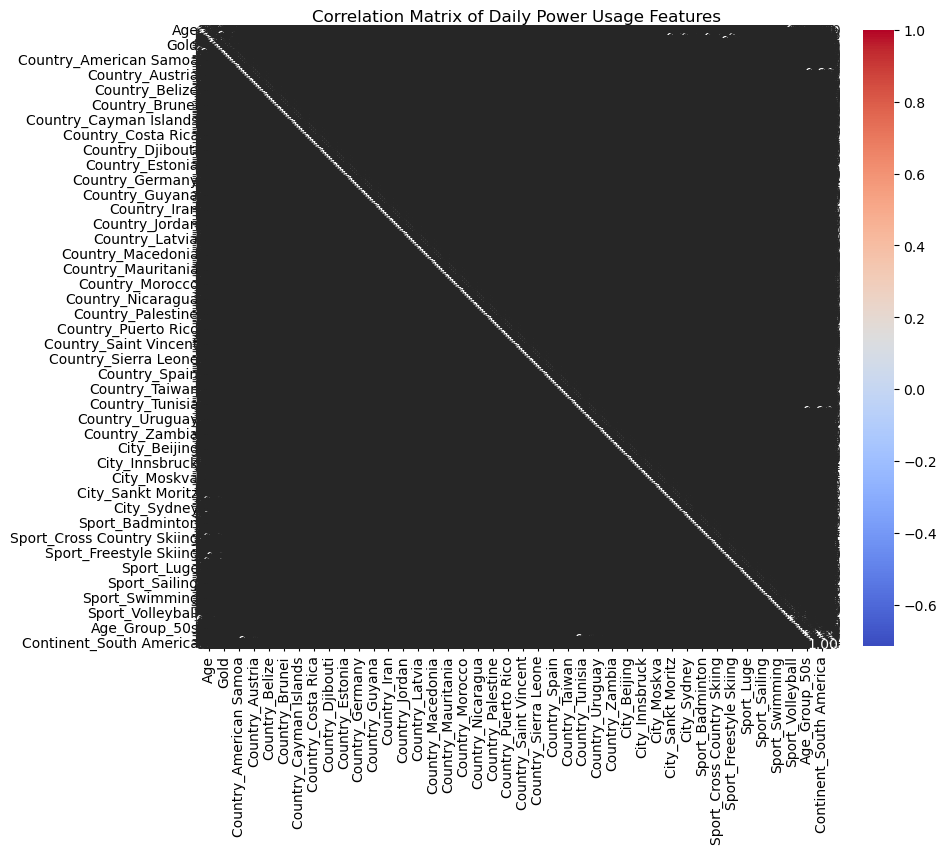

In [ ]:
# plot correlation matrix to see how features correlate with each other

numeric_df = df_agg_encoded.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

plt.title('Correlation Matrix of Athlete Attributes')
plt.show()

Well that's not helpful. It looks like we will have to cluster first to do anything productive with the sport data, because otherwise there are too many values. Let's reduce the values only include age, height, weight, continent, and engineered features.

In [101]:
# remove sport and country and one-hot encode a stripped down version of the dataframe for easier analysis

stripped_agg_df = aggregated_df.drop(columns=['Sport', 'Country', 'City'])
stripped_agg_df.head(10)

,Name,Age,Sex,Height,Weight,Season,Year,Num_Events,Num_Medals,Gold,Silver,Bronze,First_Olympics,BMI,Age_Group,Continent
0,Th Anh,20,0,165,58,1,2016,1,0,0,0,0,1,21.3,20s,Asia
1,Th Ngn Thng,19,0,147,47,1,2008,5,0,0,0,0,1,21.8,10s,Asia
2,Th Ngn Thng,23,0,147,47,1,2012,2,0,0,0,0,0,21.8,20s,Asia
3,Tin Tun,21,1,173,63,1,1988,1,0,0,0,0,1,21.0,20s,Asia
4,A Dijiang,24,1,180,80,1,1992,1,0,0,0,0,1,24.7,20s,Asia
5,A Lamusi,23,1,170,60,1,2012,1,0,0,0,0,1,20.8,20s,Asia
6,"A. J. Tyronne Benildus ""Benny"" Fernando",27,1,179,70,1,1996,1,0,0,0,0,1,21.8,20s,Asia
7,"A. Joshua ""Josh"" West",27,1,207,105,1,2004,1,0,0,0,0,1,24.5,20s,Europe
8,"A. Joshua ""Josh"" West",31,1,207,105,1,2008,1,1,0,1,0,0,24.5,30s,Europe
9,"A. W. Nancy ""Nan"" Rae",16,0,156,53,1,1960,1,0,0,0,0,1,21.8,10s,Europe


In [102]:
# re one-hot encode the stripped down dataframe

stripped_agg_encoded_df = pd.get_dummies(stripped_agg_df, columns=['Age_Group', 'Continent'], dtype=int) 
stripped_agg_encoded_df.head(10)

,Name,Age,Sex,Height,Weight,Season,Year,Num_Events,Num_Medals,Gold,...,Age_Group_50s,Age_Group_60s,Age_Group_70s,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown
0,Th Anh,20,0,165,58,1,2016,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Th Ngn Thng,19,0,147,47,1,2008,5,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Th Ngn Thng,23,0,147,47,1,2012,2,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Tin Tun,21,1,173,63,1,1988,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,A Dijiang,24,1,180,80,1,1992,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,A Lamusi,23,1,170,60,1,2012,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,"A. J. Tyronne Benildus ""Benny"" Fernando",27,1,179,70,1,1996,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,"A. Joshua ""Josh"" West",27,1,207,105,1,2004,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8,"A. Joshua ""Josh"" West",31,1,207,105,1,2008,1,1,0,...,0,0,0,0,0,1,0,0,0,0
9,"A. W. Nancy ""Nan"" Rae",16,0,156,53,1,1960,1,0,0,...,0,0,0,0,0,1,0,0,0,0


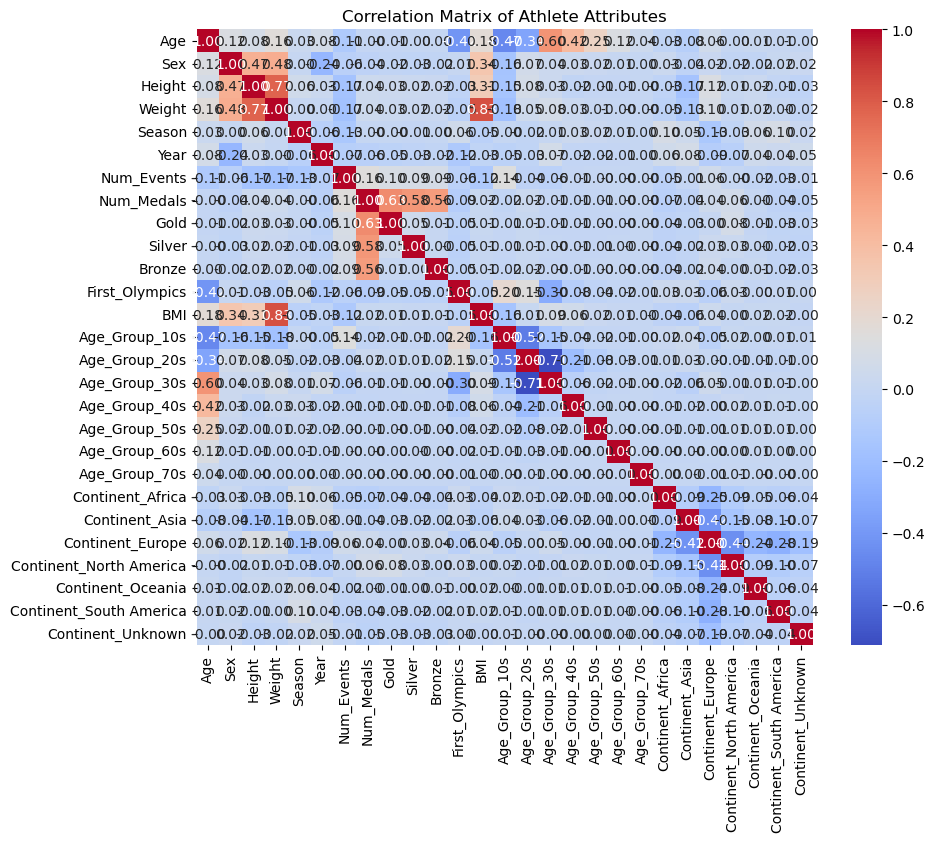

In [104]:
# plot correlation matrix to see how features correlate with each other - with less features

numeric_df = stripped_agg_encoded_df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

plt.title('Correlation Matrix of Athlete Attributes')
plt.show()

This is still a lot of data, so let's only look at engineered features first so we can get a better look at values.

In [107]:
# removing more features for easier analysis

engineered_agg_df = aggregated_df.drop(columns=['Height', 'Weight', 'Age', 'Continent', 'Sport', 'Country', 'City'])
engineered_agg_df.head(10)

,Name,Sex,Season,Year,Num_Events,Num_Medals,Gold,Silver,Bronze,First_Olympics,BMI,Age_Group
0,Th Anh,0,1,2016,1,0,0,0,0,1,21.3,20s
1,Th Ngn Thng,0,1,2008,5,0,0,0,0,1,21.8,10s
2,Th Ngn Thng,0,1,2012,2,0,0,0,0,0,21.8,20s
3,Tin Tun,1,1,1988,1,0,0,0,0,1,21.0,20s
4,A Dijiang,1,1,1992,1,0,0,0,0,1,24.7,20s
5,A Lamusi,1,1,2012,1,0,0,0,0,1,20.8,20s
6,"A. J. Tyronne Benildus ""Benny"" Fernando",1,1,1996,1,0,0,0,0,1,21.8,20s
7,"A. Joshua ""Josh"" West",1,1,2004,1,0,0,0,0,1,24.5,20s
8,"A. Joshua ""Josh"" West",1,1,2008,1,1,0,1,0,0,24.5,30s
9,"A. W. Nancy ""Nan"" Rae",0,1,1960,1,0,0,0,0,1,21.8,10s


In [111]:
# re one-hot encode the engineered features stripped down dataframe

stripped_eng_encoded_df = pd.get_dummies(engineered_agg_df, columns=['Age_Group'], dtype=int) 
stripped_eng_encoded_df.head(10)

,Name,Sex,Season,Year,Num_Events,Num_Medals,Gold,Silver,Bronze,First_Olympics,BMI,Age_Group_10s,Age_Group_20s,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_60s,Age_Group_70s
0,Th Anh,0,1,2016,1,0,0,0,0,1,21.3,0,1,0,0,0,0,0
1,Th Ngn Thng,0,1,2008,5,0,0,0,0,1,21.8,1,0,0,0,0,0,0
2,Th Ngn Thng,0,1,2012,2,0,0,0,0,0,21.8,0,1,0,0,0,0,0
3,Tin Tun,1,1,1988,1,0,0,0,0,1,21.0,0,1,0,0,0,0,0
4,A Dijiang,1,1,1992,1,0,0,0,0,1,24.7,0,1,0,0,0,0,0
5,A Lamusi,1,1,2012,1,0,0,0,0,1,20.8,0,1,0,0,0,0,0
6,"A. J. Tyronne Benildus ""Benny"" Fernando",1,1,1996,1,0,0,0,0,1,21.8,0,1,0,0,0,0,0
7,"A. Joshua ""Josh"" West",1,1,2004,1,0,0,0,0,1,24.5,0,1,0,0,0,0,0
8,"A. Joshua ""Josh"" West",1,1,2008,1,1,0,1,0,0,24.5,0,0,1,0,0,0,0
9,"A. W. Nancy ""Nan"" Rae",0,1,1960,1,0,0,0,0,1,21.8,1,0,0,0,0,0,0


### Athlete-specific attribute correlations

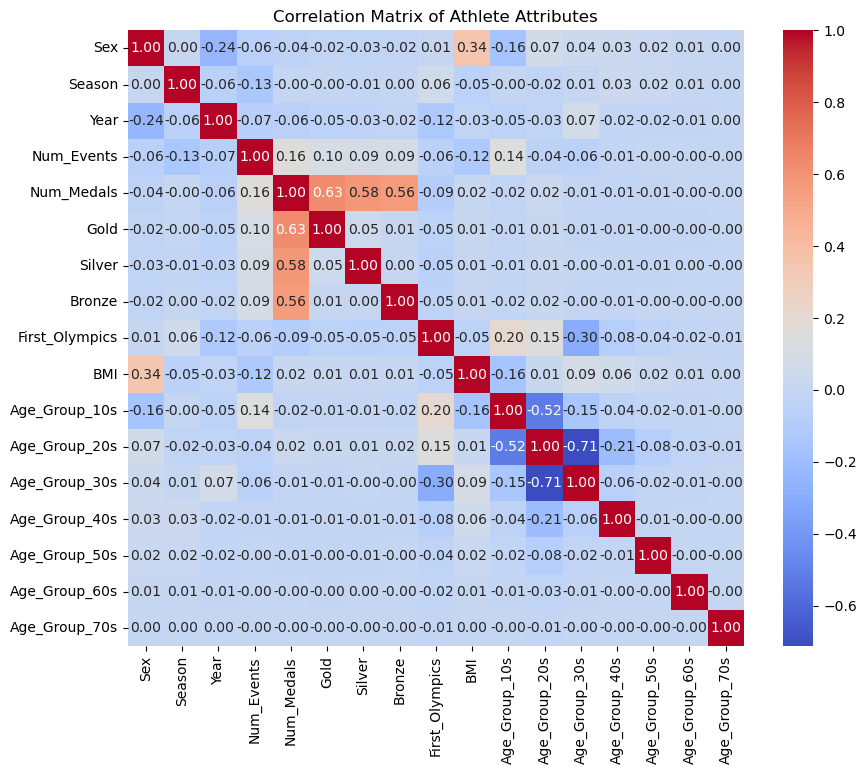

In [112]:
# plot correlation matrix to see how features correlate with each other - with even less features!

numeric_df = stripped_eng_encoded_df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

plt.title('Correlation Matrix of Athlete Attributes')
plt.show()

Okay this is becoming legible. We can see in this 

### Spatial correlations
Including continent

In [ ]:
# insert code

### Sport correlations
Including which sports earn the most medals

In [ ]:
# insert code

## 5. Clustering

With out newly engineered features, we can start the process of clustering to find similar sports/athletes, to which we will apply linear regression to analyze the strongest predictors of medal winning.

- agglomerative (bottom-up) to see how many clusters there should be'
- also do a k-means elbow to see if this shows the same value as agglo - pick k based on this
- each k into its own dataframe

In [ ]:
# insert code



## 6. Cluster Linear Regression

With outliers removed, we can move to linear regression and analysis of the clusters to see what the strongest predictors of winning a medal are.
- linear regression
- compute correlations
- correlation matrix

## 7. Addressing Outliers

Now that we have similar sports clustered, we can look into outliers to see if there is anything biasing or skewing the dataset.
- outlier check
- remove 3 std away? (if there are any)

In [ ]:
# code

## 8. Final Linear Regression

Now that we've removed outliers, let's do a final correlation analysis and linear regression to compare model performance.

In [ ]:
# insert code

## 9. Changes Over Time

- compare predictors in a few different years to see how it has changed
- also analyze gender/age/amt sports/amt medals/locations/number participants etc. over time to see how olympics have changed (to tie to regression changes)



In [ ]:
# insert code

## 10. Conclusions

- strongest medal predictors are: X
- Olympics have changed in X, Y, and Z ways.
- maybe a graph if we feel saucy